# Imports

In this section, we import the necessary libraries and modules.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cross Validation

In this section we check that the outputs of GraphX are the same with the outputs of Flink.

## Degree Centrality

In [3]:
# Open the first file and read the combinations of vertex, degree value into a set
with open('../workspace-graphx/outputs/degreeCentrality.txt', 'r') as file1:
    set1 = set(line.strip() for line in file1)

# Open the second file and read the combinations of vertex, degree value into a set
with open('../workspace-flink/outputs/degreeCentrality.txt', 'r') as file2:
    set2 = set(line.strip() for line in file2)

# Check if the two sets contain the same degree values for each vertex
if set1 == set2:
    print("The two files contain the same degree values for each vertex.")
else:
    print("The two files do not contain the same degree values for each vertex.")

The two files contain the same degree values for each vertex.


## Shortest Paths

In [4]:
# Open the first file and read the combinations of vertex, shorest path length into a set
shortest1 = pd.read_csv('../workspace-graphx/outputs/shortestPaths.txt', sep=" ", header=None)

# Open the second file and read the combinations of vertex, shorest path length into a set
shortest2 = pd.read_csv('../workspace-flink/outputs/shortestPaths.txt', sep=" ", header=None)

# Keep only the vertexes that are reachable from the source vertex
shortest1 = shortest1[shortest1[1] != np.inf]
shortest2 = shortest2[shortest2[1] < 1000000000000]

shortest1 = shortest1.astype(int)
shortest2 = shortest2.astype(int)

# Sort the dataframes by vertex
shortest1 = shortest1.sort_values(by=[0])
shortest2 = shortest2.sort_values(by=[0])

# Reset the index of the dataframes
shortest1 = shortest1.reset_index(drop=True)
shortest2 = shortest2.reset_index(drop=True)

if(shortest1[1].equals(shortest2[1])):
    print("The two files contain the same shortest paths for each reachable vertex.")
else:
    print("The two files do not contain the same shortest paths for each reachable vertex.")

The two files contain the same shortest paths for each reachable vertex.


## Triangle Count

In [5]:
# Open the first file and read the triangle count
with open('../workspace-graphx/outputs/triangleCount.txt', 'r') as file1:
    set1 = set(line.strip() for line in file1)

# Open the second file and read the triangle count
with open('../workspace-flink/outputs/triangleCount.txt', 'r') as file2:
    set2 = set(line.strip() for line in file2)

# Check if the two sets contain the same triangle count
if set1 == set2:
    print("The two files contain the same triangle count.")
else:
    print("The two files do not contain the same triangle count.")

The two files contain the same triangle count.


## Weakly Connected Components

In [6]:
# Open the first file and read the combinations of vertex, component id into a set
with open('../workspace-graphx/outputs/weaklyConnectedComponents.txt', 'r') as file1:
    set1 = set(line.strip() for line in file1)

# Open the second file and read the combinations of vertex, component id into a set
with open('../workspace-flink/outputs/weaklyConnectedComponents.txt', 'r') as file2:
    set2 = set(line.strip() for line in file2)

# Check if the two sets contain the same combinations of vertex, component id
if set1 == set2:
    print("The two files contain the same weakly connected components.")
else:
    print("The two files do not contain the same weakly connected components.")

The two files contain the same weakly connected components.


# Data Analysis

In this section, we perform some analytics on the outputs to validate the results. We will use the GraphX outputs, since both libraries have the same outputs.

## Degree Centrality

In [7]:
# Read the degree centrality output into a dataframe
df = pd.read_csv('../workspace-graphx/outputs/degreeCentrality.txt', sep=" ", header=None)

# Degrees is the second row of the dataframe
degrees = df[1]

# Find max degree
max_degree = max(degrees)
print(f"Max degree: {max_degree}")

# Find average degree
average_degree = sum(degrees) / len(degrees)
print(f"Average degree: {average_degree:.4f}")

Max degree: 6353
Average degree: 11.6592


We can see that both `Max degree` and `Average degree` are in accordance with the values `Maximum degree` and `Average degree` on the [dataset statistics](http://konect.cc/networks/web-Google/).

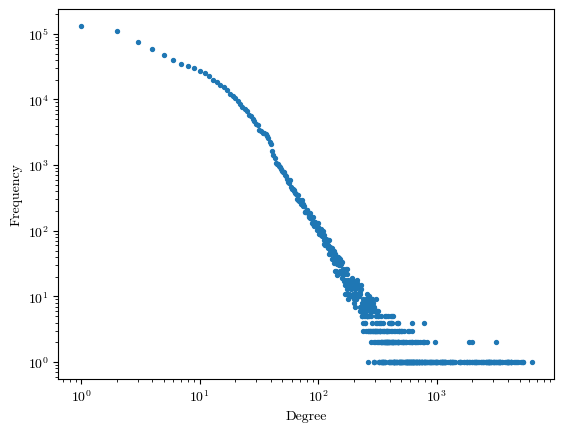

In [17]:
# Get degrees frequencies
dgs, freqs = np.unique(degrees, return_counts=True)

# Plot the degree distribution log plot
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.scatter(dgs, freqs, s=8)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale('log')
plt.yscale('log')
plt.show()

We can see that the `Degree Distribution log Plot` is in accordance with the [plot](http://konect.cc/plot/degree.a.web-Google.full.png) on the [dataset statistics](http://konect.cc/networks/web-Google/).

## Shortest Paths

In [9]:
# Read the shortest paths output into a dataframe
spaths = pd.read_csv('../workspace-graphx/outputs/shortestPaths.txt', sep=" ", header=None)

# Shortest paths is the second row of the dataframe
spaths = spaths[1]

# Keep only the vertexes that are reachable from the source vertex
spaths = spaths[spaths != np.inf]
print(f"Number of vertexes that are reachable from the source vertex: {spaths.shape[0]}")

# Find max shortest path
max_path = max(spaths)
print(f"Max shortest path: {max_path}")

# Find average shortest path
avg_path = sum(spaths) / len(spaths)
print(f"Average shortest path: {avg_path:.4f}")

Number of vertexes that are reachable from the source vertex: 600493
Max shortest path: 32.0
Average shortest path: 11.2628


For the shortest paths we really do not have any statistics that we can validate against. As a note, we calculated them with a `source vertex` of `0`.

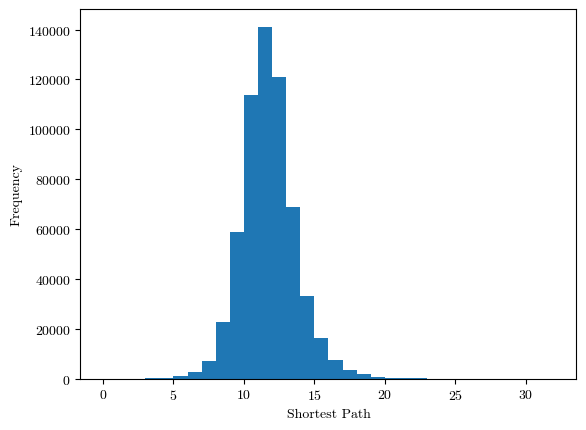

In [16]:
# Get shortest paths frequencies
sps, frequencies = np.unique(spaths, return_counts=True)

# Plot the shortest paths distribution plot
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.hist(spaths, bins=32)
plt.xlabel("Shortest Path")
plt.ylabel("Frequency")
plt.show()

We can see that the `Shortest Paths Distribution Plot` is a Poisson Distribution around the `Average Shortest Path` distance we calculated above.

## Triangle Count

In [11]:
# Read the triangle count output into a dataframe
triangles = pd.read_csv('../workspace-graphx/outputs/triangleCount.txt', sep=" ", header=None)

print(f"Triangle count: {triangles[0][0]}")

Triangle count: 13391903


We can see that the `Triangle count` is in accordance with the value `Triangle count` on the [dataset statistics](http://konect.cc/networks/web-Google/).

## Weakly Connected Components

In [12]:
# Read the weakly connected components output into a dataframe
wcc = pd.read_csv('../workspace-graphx/outputs/weaklyConnectedComponents.txt', sep=" ", header=None)

# Weakly connected components is the second row of the dataframe
wcc = wcc[1]

# Find index of largest WCC
print(f"Index of largest WCC: {wcc.value_counts().idxmax()}")

# Find number of nodes in largest CC
print(f"Number of nodes in largest WCC: {wcc.value_counts().max()}")

Index of largest WCC: 0
Number of nodes in largest WCC: 855802


We can see that the `Number of nodes in largest WCC` is in accordance with the value `Nodes in largest WCC` on the [dataset statistics](https://snap.stanford.edu/data/web-Google.html).